Saving grayscale2.jpg to grayscale2.jpg
Shape of A: (256, 256)
Shape of U: (256, 256)
Shape of Σ (as vector): (256,)
Shape of Vᵀ: (256, 256)


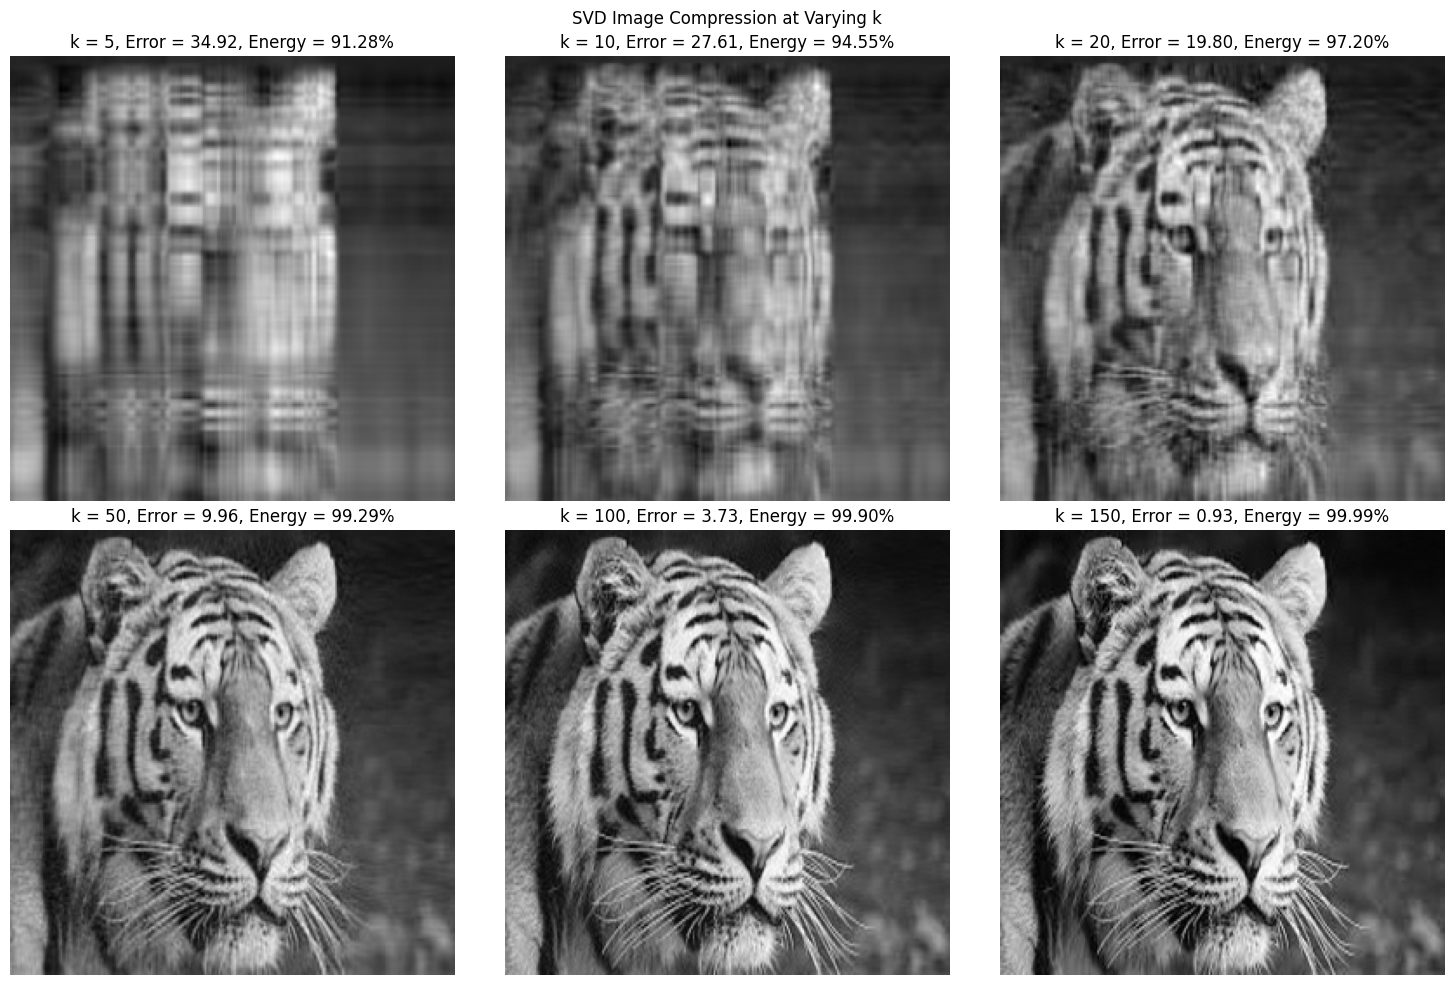

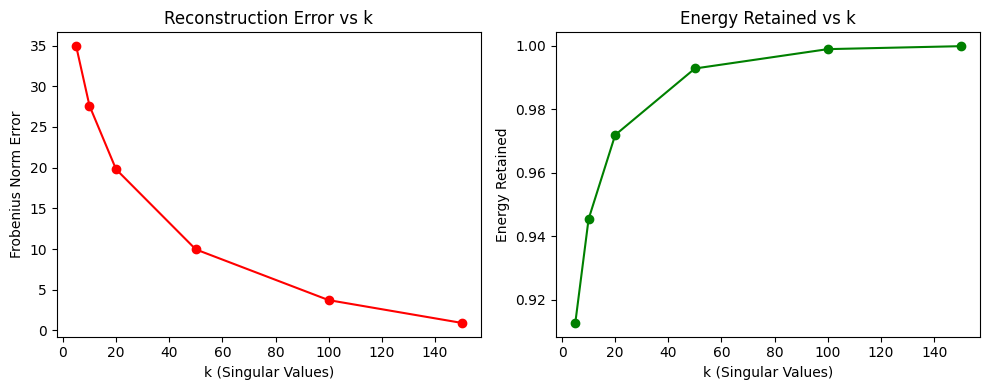

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from numpy.linalg import svd, norm
from google.colab import files
from io import BytesIO
from PIL import Image

# 1. Upload and Convert Image
def load_uploaded_grayscale_image(size=(256, 256)):
    uploaded = files.upload()
    for fname in uploaded:
        img = Image.open(BytesIO(uploaded[fname]))
        img = img.convert('L')  # Convert to grayscale
        img = img.resize(size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return img_array

# 2. SVD Decomposition
def apply_svd(A):
    U, S, VT = svd(A, full_matrices=False)
    print("Shape of A:", A.shape)
    print("Shape of U:", U.shape)
    print("Shape of Σ (as vector):", S.shape)
    print("Shape of Vᵀ:", VT.shape)
    return U, S, VT

# 3. Image Compression
def reconstruct_image(U, S, VT, k):
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]
    Ak = np.dot(Uk, np.dot(Sk, VTk))
    return Ak

# 4. Error Analysis
def compute_frobenius_error(original, compressed):
    return norm(original - compressed, ord='fro')

# Main Program
A = load_uploaded_grayscale_image()

U, S, VT = apply_svd(A)

ks = [5, 10, 20, 50, 100, 150]
errors = []
energy_ratios = []

plt.figure(figsize=(15, 10))
for i, k in enumerate(ks):
    Ak = reconstruct_image(U, S, VT, k)
    error = compute_frobenius_error(A, Ak)
    energy = np.sum(S[:k] ** 2) / np.sum(S ** 2)

    errors.append(error)
    energy_ratios.append(energy)

    plt.subplot(2, 3, i + 1)
    plt.imshow(Ak, cmap='gray')
    plt.title(f'k = {k}, Error = {error:.2f}, Energy = {energy:.2%}')
    plt.axis('off')

plt.suptitle("SVD Image Compression at Varying k")
plt.tight_layout()
plt.show()

# Plot Error and Energy Tradeoff
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(ks, errors, 'o-', color='red')
plt.title("Reconstruction Error vs k")
plt.xlabel("k (Singular Values)")
plt.ylabel("Frobenius Norm Error")

plt.subplot(1, 2, 2)
plt.plot(ks, energy_ratios, 'o-', color='green')
plt.title("Energy Retained vs k")
plt.xlabel("k (Singular Values)")
plt.ylabel("Energy Retained")

plt.tight_layout()
plt.show()


Saving grayscale2.jpg to grayscale2 (1).jpg
Shape of A: (256, 256)
Shape of U: (256, 256)
Shape of Σ (as vector): (256,)
Shape of Vᵀ: (256, 256)


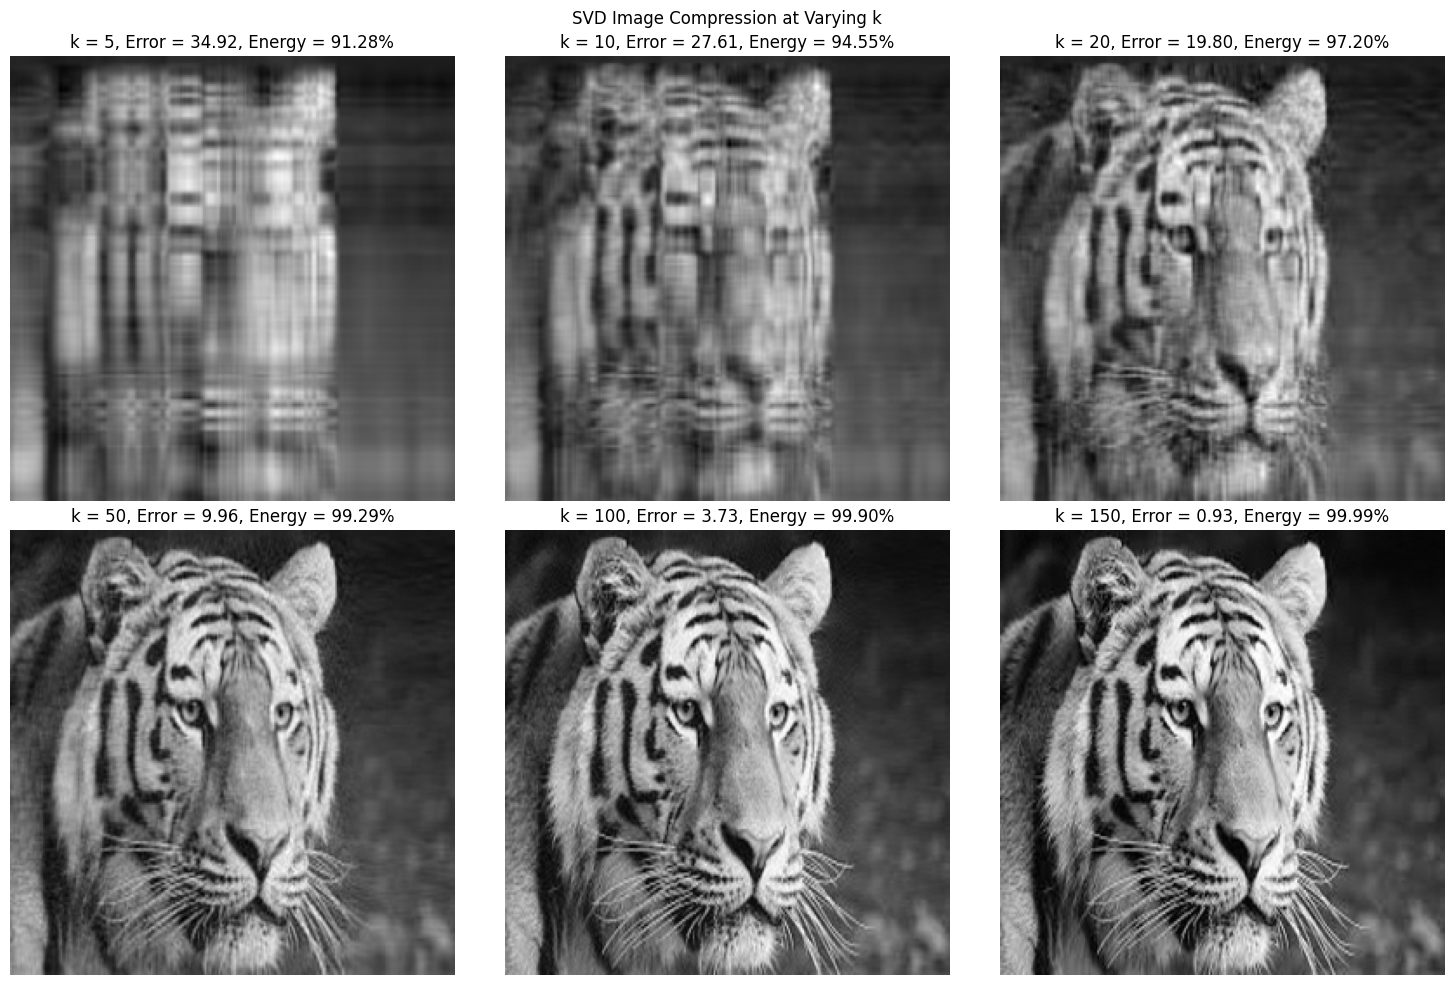

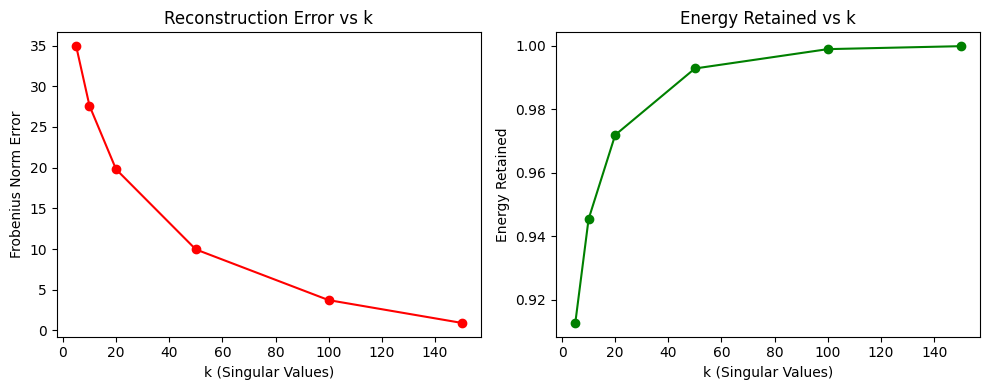

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from numpy.linalg import svd, norm
from google.colab import files
from io import BytesIO
from PIL import Image

# 1. Upload and Convert Image
def load_uploaded_grayscale_image(size=(256, 256)):
    uploaded = files.upload()
    for fname in uploaded:
        img = Image.open(BytesIO(uploaded[fname]))
        img = img.convert('L')  # Convert to grayscale
        img = img.resize(size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return img_array

# 2. SVD Decomposition
def apply_svd(A):
    U, S, VT = svd(A, full_matrices=False)
    print("Shape of A:", A.shape)
    print("Shape of U:", U.shape)
    print("Shape of Σ (as vector):", S.shape)
    print("Shape of Vᵀ:", VT.shape)
    return U, S, VT

# 3. Image Compression
def reconstruct_image(U, S, VT, k):
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]
    Ak = np.dot(Uk, np.dot(Sk, VTk))
    return Ak

# 4. Error Analysis
def compute_frobenius_error(original, compressed):
    return norm(original - compressed, ord='fro')

# Main Program
A = load_uploaded_grayscale_image()

U, S, VT = apply_svd(A)

ks = [5, 10, 20, 50, 100, 150]
errors = []
energy_ratios = []

plt.figure(figsize=(15, 10))
for i, k in enumerate(ks):
    Ak = reconstruct_image(U, S, VT, k)
    error = compute_frobenius_error(A, Ak)
    energy = np.sum(S[:k] ** 2) / np.sum(S ** 2)

    errors.append(error)
    energy_ratios.append(energy)

    plt.subplot(2, 3, i + 1)
    plt.imshow(Ak, cmap='gray')
    plt.title(f'k = {k}, Error = {error:.2f}, Energy = {energy:.2%}')
    plt.axis('off')

plt.suptitle("SVD Image Compression at Varying k")
plt.tight_layout()
plt.show()

# Plot Error and Energy Tradeoff
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(ks, errors, 'o-', color='red')
plt.title("Reconstruction Error vs k")
plt.xlabel("k (Singular Values)")
plt.ylabel("Frobenius Norm Error")

plt.subplot(1, 2, 2)
plt.plot(ks, energy_ratios, 'o-', color='green')
plt.title("Energy Retained vs k")
plt.xlabel("k (Singular Values)")
plt.ylabel("Energy Retained")

plt.tight_layout()
plt.show()


--- 1) Image to Matrix Conversion ---
Successfully loaded image from: /content/grayscale2.jpg
Converted image to grayscale.
Original image matrix A shape: (183, 275)
Original image matrix A data type: float64
First 5x5 block of matrix A:
[[ 5.  8. 12. 16. 19.]
 [ 5.  8. 12. 16. 19.]
 [ 5.  8. 12. 16. 19.]
 [ 5.  8. 12. 16. 19.]
 [ 5.  8. 12. 16. 19.]]


--- 2) SVD Decomposition ---
Shape of U (left singular vectors): (183, 183)
Shape of s (singular values): (183,)
Shape of Vh (right singular vectors, V^T): (275, 275)

Properties of SVD components:
Number of singular values: 183
First 5 singular values: [24019.3017279   5152.02276255  4049.37996926  3244.39277779
  2671.56604206]
Sum of all singular values: 112860.81
Condition number (s_max / s_min): 1340.78 (indicates matrix stability)


--- 3) Image Compression with SVD ---
Total energy (sum of squared singular values): 704679470.00

For k = 5:
  Frobenius Norm Error (||A - A_k||_F): 8190.12
  Percentage of Energy Retained: 90.47%
  C

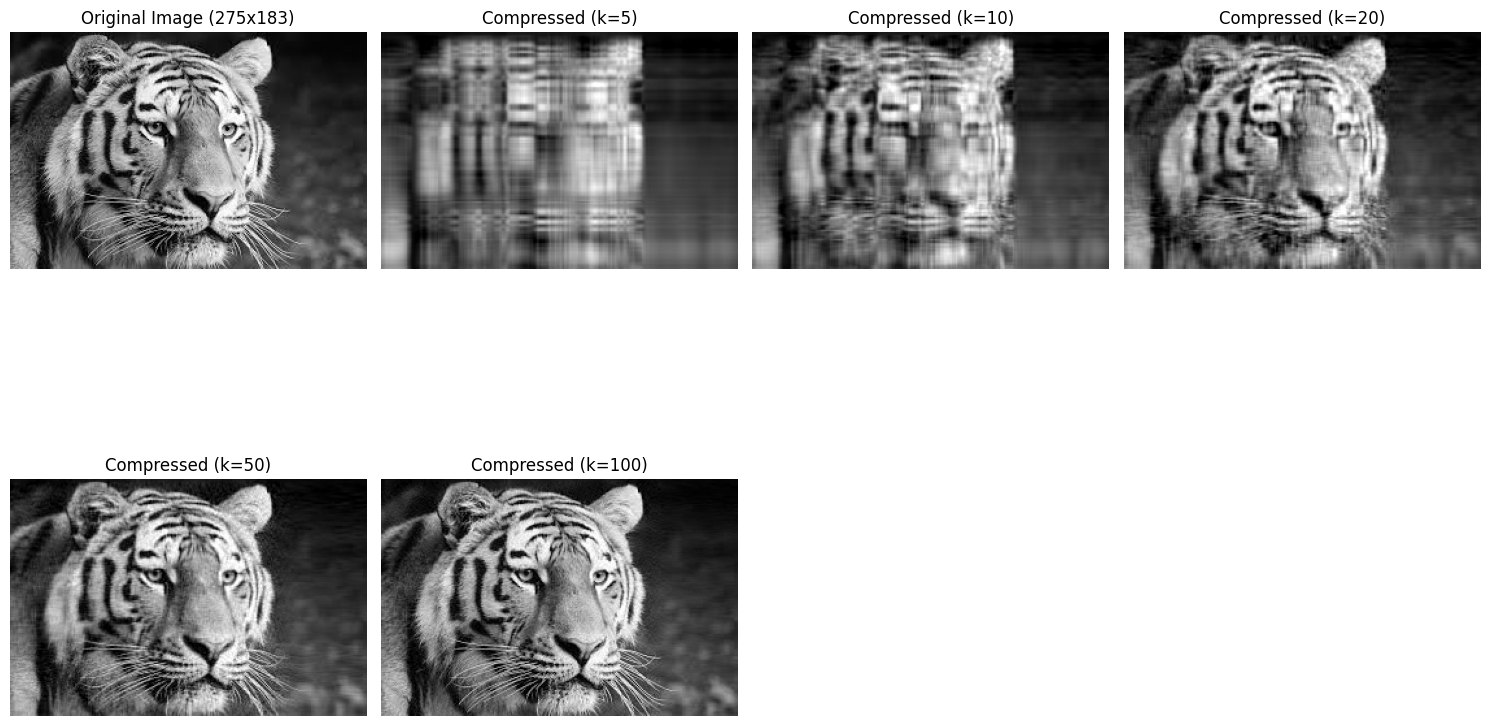


--- Summary of Tradeoff ---
As 'k' (the number of singular values retained) increases:
  - The compressed image quality improves, becoming closer to the original.
  - The Frobenius norm error (difference between original and compressed) decreases.
  - The amount of information/energy retained (sum of squared singular values) increases.
  - However, the compression ratio decreases (more data is retained), meaning less compression is achieved.
The optimal 'k' value depends on the desired balance between image quality and compression ratio.


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Removed requests and BytesIO as they are no longer needed for URL fetching

# --- Configuration ---
# Specify the path to your local grayscale image file.
# Example: IMAGE_PATH = "my_image.jpg"
# Make sure the image file is in the same directory as the script, or provide the full path.
IMAGE_PATH = "/content/grayscale2.jpg" # <--- IMPORTANT: Change this to your image file path!

# List of 'k' values for compression
K_VALUES = [5, 10, 20, 50, 100, 200]

# --- 1) Image to Matrix Conversion ---
print("--- 1) Image to Matrix Conversion ---")

try:
    # Open the image from the local file path
    img = Image.open(IMAGE_PATH)
    print(f"Successfully loaded image from: {IMAGE_PATH}")
except FileNotFoundError:
    print(f"Error: Image file not found at '{IMAGE_PATH}'.")
    print("Attempting to generate a dummy grayscale image as a fallback...")
    # Fallback to a dummy grayscale image if the file is not found
    try:
        img = Image.new('L', (256, 256), color = 'gray')
        print("Generated a dummy grayscale image.")
    except Exception as e:
        print(f"Could not generate a dummy image: {e}")
        print("Exiting. Please check the IMAGE_PATH or ensure Pillow is installed.")
        exit()
except Exception as e:
    print(f"An unexpected error occurred while opening the image: {e}")
    print("Exiting. Please check the IMAGE_PATH or ensure Pillow is installed.")
    exit()

# Convert image to grayscale if it's not already
if img.mode != 'L':
    img = img.convert('L')
    print("Converted image to grayscale.")

# Convert the grayscale image to a NumPy array (matrix A)
A = np.asarray(img, dtype=np.float64) # Use float64 for numerical stability
print(f"Original image matrix A shape: {A.shape}")
print(f"Original image matrix A data type: {A.dtype}")
print(f"First 5x5 block of matrix A:\n{A[:5, :5]}\n")

# --- 2) SVD Decomposition ---
print("\n--- 2) SVD Decomposition ---")

# Apply SVD to decompose the matrix A
# U: Unitary matrix having left singular vectors as columns.
# s: The singular values, sorted in descending order.
# Vh: Unitary matrix having right singular vectors as rows (V transpose).
U, s, Vh = np.linalg.svd(A)

print(f"Shape of U (left singular vectors): {U.shape}")
print(f"Shape of s (singular values): {s.shape}")
print(f"Shape of Vh (right singular vectors, V^T): {Vh.shape}")

print("\nProperties of SVD components:")
print(f"Number of singular values: {len(s)}")
print(f"First 5 singular values: {s[:5]}")
print(f"Sum of all singular values: {np.sum(s):.2f}")
print(f"Condition number (s_max / s_min): {s[0] / s[-1]:.2f} (indicates matrix stability)\n")

# --- 3) Image Compression with SVD ---
print("\n--- 3) Image Compression with SVD ---")

# Create a figure to display original and compressed images
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(2, len(K_VALUES) // 2 + 1, 1)
plt.imshow(A, cmap='gray')
plt.title(f'Original Image ({A.shape[1]}x{A.shape[0]})')
plt.axis('off')

# Calculate total energy (sum of squared singular values)
total_energy = np.sum(s**2)
print(f"Total energy (sum of squared singular values): {total_energy:.2f}\n")

# Reconstruct the image for different values of k
for i, k in enumerate(K_VALUES):
    if k > len(s):
        print(f"Skipping k={k} as it's greater than the number of singular values ({len(s)}).")
        continue

    # Reconstruct the image using the top 'k' singular values and vectors
    # U[:, :k] selects the first 'k' columns of U
    # np.diag(s[:k]) creates a diagonal matrix from the first 'k' singular values
    # Vh[:k, :] selects the first 'k' rows of Vh (V transpose)
    A_k = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]

    # Ensure the reconstructed matrix values are within valid image range [0, 255]
    A_k = np.clip(A_k, 0, 255).astype(np.uint8)

    # Display the compressed image
    plt.subplot(2, len(K_VALUES) // 2 + 1, i + 2)
    plt.imshow(A_k, cmap='gray')
    plt.title(f'Compressed (k={k})')
    plt.axis('off')

    # --- 4) Error Analysis ---
    # Compute the Frobenius norm of the difference between original and compressed image
    error_frobenius = np.linalg.norm(A - A_k, 'fro')

    # Calculate the percentage of energy retained
    energy_retained = np.sum(s[:k]**2)
    percentage_energy_retained = (energy_retained / total_energy) * 100

    print(f"For k = {k}:")
    print(f"  Frobenius Norm Error (||A - A_k||_F): {error_frobenius:.2f}")
    print(f"  Percentage of Energy Retained: {percentage_energy_retained:.2f}%")

    # Comment on tradeoff (will be more visible when you run the plot)
    if k < 20:
        print("  Comment: Image quality is significantly degraded, many details are lost.")
    elif k < 50:
        print("  Comment: Image quality improves, but still noticeable loss of detail and some blurriness.")
    elif k < 100:
        print("  Comment: Image quality is quite good, most major features are visible, minor details might be blurry.")
    else:
        print("  Comment: Image quality is very close to the original, with minimal loss of detail.")
    print("-" * 30)

plt.tight_layout()
plt.show()

print("\n--- Summary of Tradeoff ---")
print("As 'k' (the number of singular values retained) increases:")
print("  - The compressed image quality improves, becoming closer to the original.")
print("  - The Frobenius norm error (difference between original and compressed) decreases.")
print("  - The amount of information/energy retained (sum of squared singular values) increases.")
print("  - However, the compression ratio decreases (more data is retained), meaning less compression is achieved.")
print("The optimal 'k' value depends on the desired balance between image quality and compression ratio.")


Saving grayscale2.jpg to grayscale2 (3).jpg
Shape of A: (256, 256)
Shape of U: (256, 256)
Shape of Σ (as vector): (256,)
Shape of Vᵀ: (256, 256)


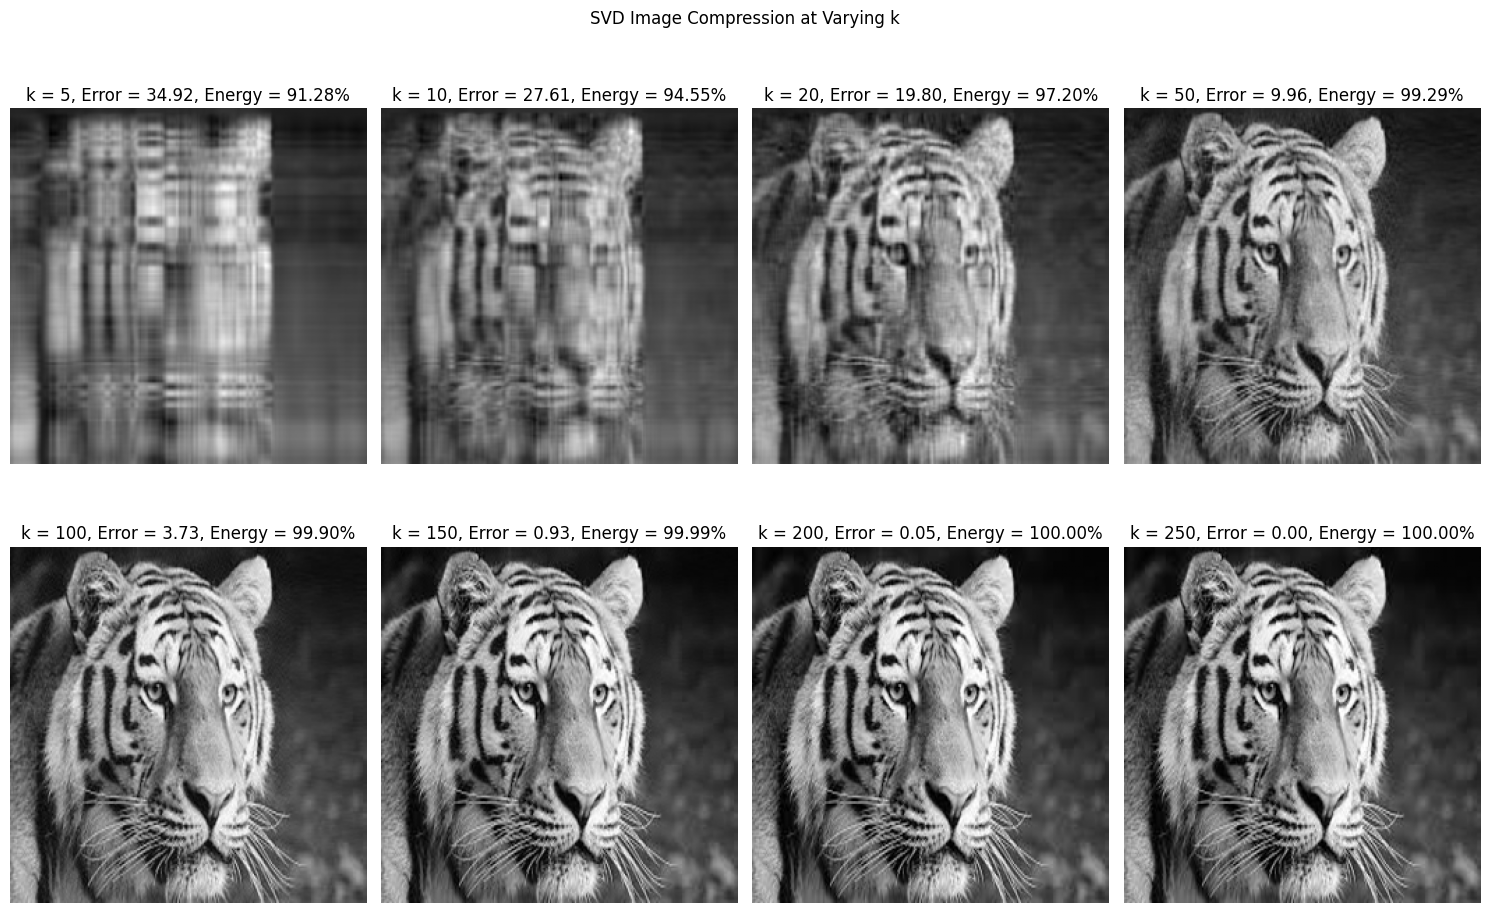

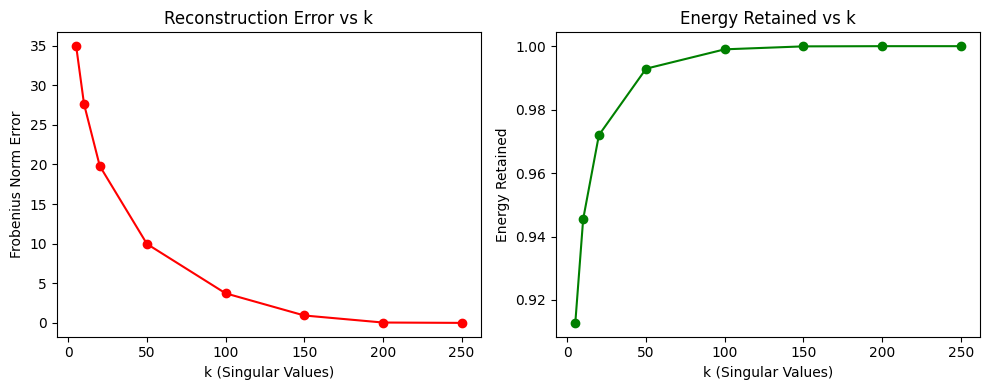

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from numpy.linalg import svd, norm
from google.colab import files
from io import BytesIO
from PIL import Image

# 1. Upload and Convert Image
def load_uploaded_grayscale_image(size=(256, 256)):
    uploaded = files.upload()
    for fname in uploaded:
        img = Image.open(BytesIO(uploaded[fname]))
        img = img.convert('L')  # Convert to grayscale
        img = img.resize(size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return img_array

# 2. SVD Decomposition
def apply_svd(A):
    U, S, VT = svd(A, full_matrices=False)
    print("Shape of A:", A.shape)
    print("Shape of U:", U.shape)
    print("Shape of Σ (as vector):", S.shape)
    print("Shape of Vᵀ:", VT.shape)
    return U, S, VT

# 3. Image Compression
def reconstruct_image(U, S, VT, k):
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]
    Ak = np.dot(Uk, np.dot(Sk, VTk))
    return Ak

# 4. Error Analysis
def compute_frobenius_error(original, compressed):
    return norm(original - compressed, ord='fro')

# Main Program
A = load_uploaded_grayscale_image()

U, S, VT = apply_svd(A)

ks = [5, 10, 20, 50, 100, 150, 200, 250]
errors = []
energy_ratios = []

plt.figure(figsize=(15, 10))
for i, k in enumerate(ks):
    Ak = reconstruct_image(U, S, VT, k)
    error = compute_frobenius_error(A, Ak)
    energy = np.sum(S[:k] ** 2) / np.sum(S ** 2)

    errors.append(error)
    energy_ratios.append(energy)

    plt.subplot(2, 4, i + 1)
    plt.imshow(Ak, cmap='gray')
    plt.title(f'k = {k}, Error = {error:.2f}, Energy = {energy:.2%}')
    plt.axis('off')

plt.suptitle("SVD Image Compression at Varying k")
plt.tight_layout()
plt.show()

# Plot Error and Energy Tradeoff
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(ks, errors, 'o-', color='red')
plt.title("Reconstruction Error vs k")
plt.xlabel("k (Singular Values)")
plt.ylabel("Frobenius Norm Error")

plt.subplot(1, 2, 2)
plt.plot(ks, energy_ratios, 'o-', color='green')
plt.title("Energy Retained vs k")
plt.xlabel("k (Singular Values)")
plt.ylabel("Energy Retained")

plt.tight_layout()
plt.show()


#PCA


<ipython-input-9-678cfd3a057d>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None).values
<ipython-input-9-678cfd3a057d>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()


Principal Component 1 explains 92.72% of the variance.
Principal Component 2 explains 7.28% of the variance.

Centered Data:
[[ 0.01409639 -0.00259874 -0.02376412 ... -0.35169956  0.12134758
  -0.00211222]
 [ 0.00393071  0.00128486 -0.01437917 ... -0.3552404   0.12169586
   0.00219799]
 [ 0.00516494 -0.00177173 -0.00432067 ... -0.35938627  0.12204428
   0.00739689]
 ...
 [-0.00110075  0.00068481  0.06411919 ... -0.28958541  0.19055181
   0.09732589]
 [ 0.01516604 -0.00114762 -0.04913957 ... -0.29563422  0.1878392
   0.08185418]
 [ 0.07701535  0.00527231 -0.09472615 ... -0.29371973  0.18821549
   0.09320955]]

Covariance Matrix:
[[ 4.93665487e-03  4.24551585e-04 -1.02247916e-03 ... -1.26785092e-03
   7.18410283e-04  5.53862712e-04]
 [ 4.24551585e-04  1.66549892e-03 -1.82059313e-04 ... -1.10889228e-04
   1.27823495e-05 -1.58369457e-04]
 [-1.02247916e-03 -1.82059313e-04  3.20754453e-03 ...  2.48913758e-04
  -2.57574825e-04 -3.57948827e-04]
 ...
 [-1.26785092e-03 -1.10889228e-04  2.4891375

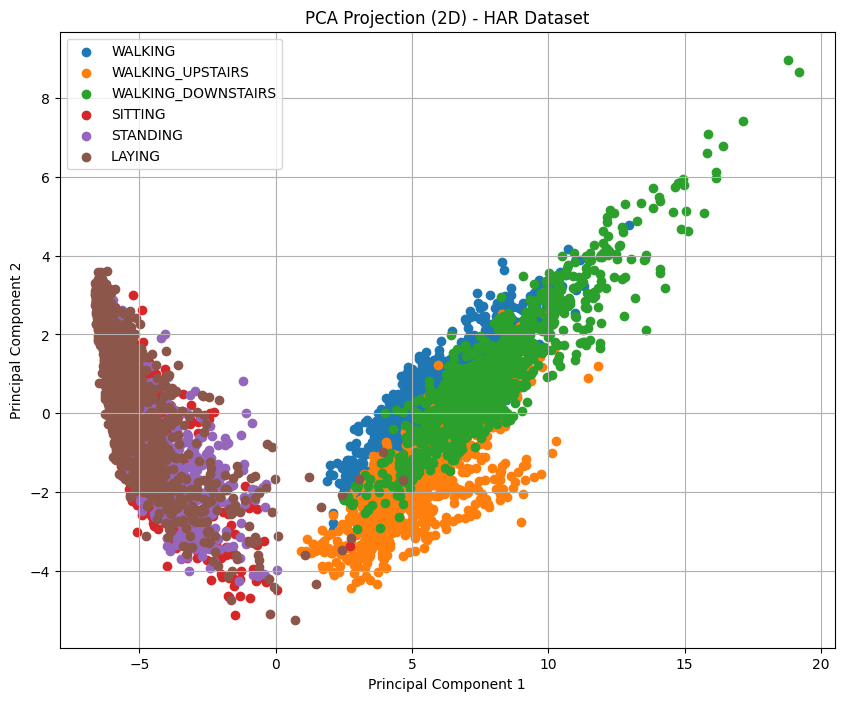

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None).values
y = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()

# Step 1: Center the data manually
def mean_center_data(X):
    mean_vector = np.mean(X, axis=0)
    X_centered = X - mean_vector
    return X_centered, mean_vector

# Step 2: Compute Covariance Matrix manually
def compute_covariance_matrix(X):
    m, n = X.shape
    covariance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            covariance_matrix[i, j] = np.sum(X[:, i] * X[:, j]) / (m - 1)
    return covariance_matrix

# Step 3: Power Iteration to find top k eigenvectors and eigenvalues
def power_iteration(A, num_simulations: int = 100):
    b_k = np.random.rand(A.shape[1])
    for _ in range(num_simulations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k))
    return eigenvalue, b_k

def compute_top_k_eigenvectors(cov_matrix, k):
    n = cov_matrix.shape[0]
    eigenvalues = []
    eigenvectors = []
    A = np.copy(cov_matrix)

    for _ in range(k):
        eigval, eigvec = power_iteration(A)
        eigenvalues.append(eigval)
        eigenvectors.append(eigvec)
        # Deflate matrix
        A = A - eigval * np.outer(eigvec, eigvec)

    return np.array(eigenvalues), np.array(eigenvectors).T  # shape (features, k)

# Step 4: Project data onto top k components
def project_data(X, eigenvectors):
    return np.dot(X, eigenvectors)

# Step 5: Plot results
def plot_2D(X_reduced, y):
    labels = {
        1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS',
        4: 'SITTING', 5: 'STANDING', 6: 'LAYING'
    }

    plt.figure(figsize=(10, 8))
    for label in np.unique(y):
        plt.scatter(X_reduced[y == label, 0], X_reduced[y == label, 1], label=labels[label])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Projection (2D) - HAR Dataset')
    plt.legend()
    plt.grid(True)
    plt.show()

# Full PCA Pipeline
X_centered, _ = mean_center_data(X)
cov_matrix = compute_covariance_matrix(X_centered)
k = 2
eigenvalues, eigenvectors = compute_top_k_eigenvectors(cov_matrix, k)
X_reduced = project_data(X_centered, eigenvectors)

# Explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
for i in range(k):
    print(f"Principal Component {i+1} explains {explained_variance[i]:.2%} of the variance.")


#print
print("\nCentered Data:")
print(X_centered)
print("\nCovariance Matrix:")
print(cov_matrix)
print("\nReduced matrix:")
print(X_reduced)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

print(explained_variance)
# Visualization
plot_2D(X_reduced, y)


#PCA without built-in

<ipython-input-3-1171aa754c1a>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None).values
<ipython-input-3-1171aa754c1a>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()


Principal Component 1 explains 92.72% of the variance.
Principal Component 2 explains 7.28% of the variance.


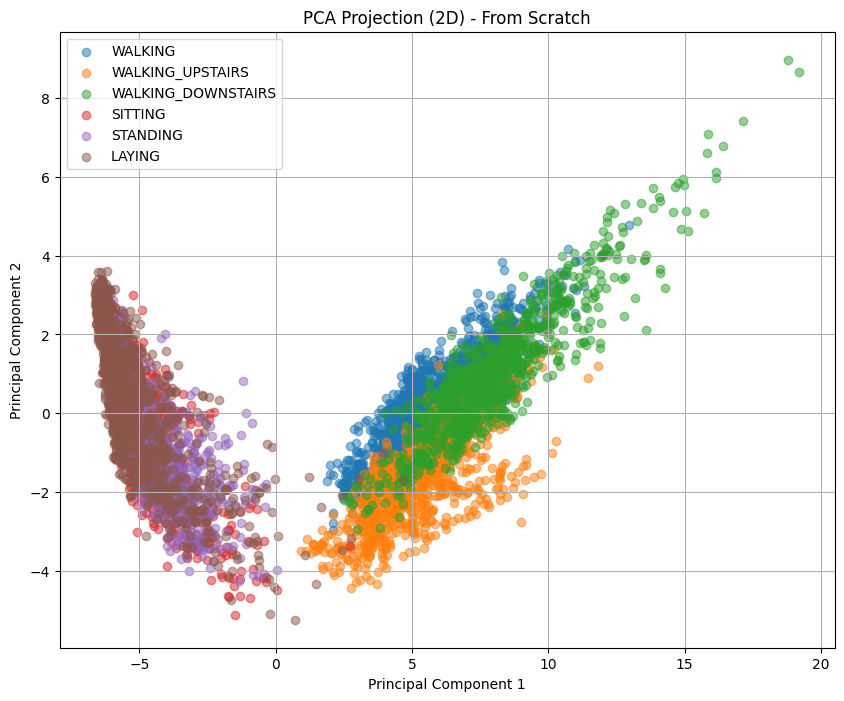

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None).values
y = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()

# Step 1: Mean Centering
# Step 1: Mean Centering (Fixed)
def center_data(X):
    means = np.mean(X, axis=0)         # Compute mean of each feature
    X_centered = X - means             # Subtract mean from each feature column
    return X_centered, means

# Step 2: Covariance Matrix (Manual)
def compute_covariance_matrix(X):
    m, n = X.shape
    cov_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cov_matrix[i, j] = sum(X[:, i] * X[:, j]) / (m - 1)
    return cov_matrix

# Step 3: Power Iteration (manual eigenvalue/eigenvector extraction)
def power_iteration(A, num_iterations=1000, tolerance=1e-10):
    b_k = np.random.rand(A.shape[1])
    b_k = b_k / np.linalg.norm(b_k)

    for _ in range(num_iterations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        if b_k1_norm == 0:
            break
        b_k_new = b_k1 / b_k1_norm
        if np.linalg.norm(b_k - b_k_new) < tolerance:
            break
        b_k = b_k_new

    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)
    )
    return eigenvalue, b_k

# Step 4: Get Top-k Eigenvectors using Deflation
def get_top_k_components(cov_matrix, k):
    n = cov_matrix.shape[0]
    eigenvalues = []
    eigenvectors = []
    A = np.copy(cov_matrix)

    for _ in range(k):
        eigval, eigvec = power_iteration(A)
        eigenvalues.append(eigval)
        eigenvectors.append(eigvec)
        # Deflation step
        A = A - eigval * np.outer(eigvec, eigvec)

    return np.array(eigenvalues), np.array(eigenvectors).T  # shape = (features, k)

# Step 5: Project data onto new k-dimensional subspace
def project_data(X, eigenvectors):
    return np.dot(X, eigenvectors)

# Step 6: Visualize in 2D
def visualize_2d(X_reduced, y):
    activity_labels = {
        1: 'WALKING',
        2: 'WALKING_UPSTAIRS',
        3: 'WALKING_DOWNSTAIRS',
        4: 'SITTING',
        5: 'STANDING',
        6: 'LAYING'
    }
    plt.figure(figsize=(10, 8))
    for label in np.unique(y):
        indices = y == label
        plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], label=activity_labels[label], alpha=0.5)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Projection (2D) - From Scratch")
    plt.legend()
    plt.grid(True)
    plt.show()

# MAIN PIPELINE
X_centered, means = center_data(X)
cov_matrix = compute_covariance_matrix(X_centered)
k = 2
eigenvalues, eigenvectors = get_top_k_components(cov_matrix, k)
X_reduced = project_data(X_centered, eigenvectors)

# Explained Variance
total_variance = sum(eigenvalues)
for i, val in enumerate(eigenvalues):
    print(f"Principal Component {i+1} explains {val / total_variance:.2%} of the variance.")

# Visualize
visualize_2d(X_reduced, y)
